In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

import numpy as np
import os
import pickle
import random
import matplotlib.pyplot as plt
import time

import importlib
import utils.ml_utils as ml_utils

## Init seeds and env variables (makes training deterministic)

In [2]:
ml_utils.init_env()

## Try different batch sizes

In [21]:
batch_sizes = [32, 256]
model_state_by_batch_size_trial_1 = {}

for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model()
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
    mc = keras.callbacks.ModelCheckpoint(
        'pickled_objects/batch_size_{}_best_weights_trial_1.h5'.format(batch_size),
        monitor='val_loss',
        mode='min',
        verbose=1,
        save_best_only=True,
        save_weights_only=True
    )
    model_state_by_batch_size_trial_1[batch_size] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=1000,
        extra_callbacks=[es, mc],
    )

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/1000
    582/Unknown - 25s 43ms/step - loss: 0.6860 - accuracy: 0.5435
Saving weights for epoch 0

Epoch 00001: val_loss improved from inf to 0.66267, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 31s 54ms/step - loss: 0.6860 - accuracy: 0.5435 - val_loss: 0.6627 - val_accuracy: 0.6279
Epoch 2/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5153
Epoch 00002: val_loss did not improve from 0.66267
582/582 [==============================] - 13s 22ms/step - loss: 0.6911 - accuracy: 0.5155 - val_loss: 0.6928 - val_accuracy: 0.5099
Epoch 3/1000
580/5

Epoch 25/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4307 - accuracy: 0.7961
Epoch 00025: val_loss did not improve from 0.43554
582/582 [==============================] - 13s 22ms/step - loss: 0.4307 - accuracy: 0.7961 - val_loss: 0.4403 - val_accuracy: 0.7865
Epoch 26/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4248 - accuracy: 0.8017
Saving weights for epoch 25

Epoch 00026: val_loss did not improve from 0.43554
582/582 [==============================] - 13s 22ms/step - loss: 0.4252 - accuracy: 0.8015 - val_loss: 0.4356 - val_accuracy: 0.7913
Epoch 27/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4190 - accuracy: 0.8078
Epoch 00027: val_loss improved from 0.43554 to 0.41058, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 13s 22ms/step - loss: 0.4189 - accuracy: 0.8077 - val_loss: 0.4106 - val_accuracy: 0.8072
Epoch 28/1000
580/582 [========================

Epoch 52/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3328 - accuracy: 0.8495
Epoch 00052: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.3328 - accuracy: 0.8495 - val_loss: 0.3731 - val_accuracy: 0.8265
Epoch 53/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3284 - accuracy: 0.8559
Epoch 00053: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.3283 - accuracy: 0.8558 - val_loss: 0.3992 - val_accuracy: 0.8132
Epoch 54/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3259 - accuracy: 0.8540
Epoch 00054: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.3260 - accuracy: 0.8539 - val_loss: 0.3845 - val_accuracy: 0.8194
Epoch 55/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3281 - accuracy: 0.8551
Epoch 00055: val_loss did not improve from 0.36908
5

Epoch 81/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2688 - accuracy: 0.8852
Saving weights for epoch 80

Epoch 00081: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.2687 - accuracy: 0.8852 - val_loss: 0.4812 - val_accuracy: 0.7915
Epoch 82/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2799 - accuracy: 0.8803
Epoch 00082: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.2802 - accuracy: 0.8802 - val_loss: 0.3905 - val_accuracy: 0.8222
Epoch 83/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2725 - accuracy: 0.8825
Epoch 00083: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.2728 - accuracy: 0.8823 - val_loss: 0.4001 - val_accuracy: 0.8156
Epoch 84/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2746 - accuracy: 0.8805
Epoch 00084: val_loss d

580/582 [============================>.] - ETA: 0s - loss: 0.2105 - accuracy: 0.9155
Epoch 00137: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.2106 - accuracy: 0.9155 - val_loss: 0.4696 - val_accuracy: 0.8031
Epoch 138/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9107
Epoch 00138: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.2137 - accuracy: 0.9107 - val_loss: 0.4039 - val_accuracy: 0.8173
Epoch 139/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2140 - accuracy: 0.9121
Epoch 00139: val_loss did not improve from 0.36908
582/582 [==============================] - 13s 22ms/step - loss: 0.2140 - accuracy: 0.9122 - val_loss: 0.4210 - val_accuracy: 0.8149
Epoch 140/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2097 - accuracy: 0.9140
Epoch 00140: val_loss did not improve from 0.36908
582/582 [===

Epoch 14/1000
72/73 [============================>.] - ETA: 0s - loss: 0.6205 - accuracy: 0.6528
Epoch 00014: val_loss did not improve from 0.63980
73/73 [==============================] - 8s 105ms/step - loss: 0.6209 - accuracy: 0.6521 - val_loss: 0.6407 - val_accuracy: 0.6232
Epoch 15/1000
72/73 [============================>.] - ETA: 0s - loss: 0.6169 - accuracy: 0.6560
Epoch 00015: val_loss improved from 0.63980 to 0.63811, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.6175 - accuracy: 0.6551 - val_loss: 0.6381 - val_accuracy: 0.6311
Epoch 16/1000
72/73 [============================>.] - ETA: 0s - loss: 0.6066 - accuracy: 0.6699
Saving weights for epoch 15

Epoch 00016: val_loss improved from 0.63811 to 0.62297, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.6066 - accuracy: 0.6699 - val_loss: 0.6230 - val

Epoch 39/1000
72/73 [============================>.] - ETA: 0s - loss: 0.4766 - accuracy: 0.7708
Epoch 00039: val_loss did not improve from 0.46267
73/73 [==============================] - 8s 106ms/step - loss: 0.4767 - accuracy: 0.7706 - val_loss: 0.4737 - val_accuracy: 0.7668
Epoch 40/1000
72/73 [============================>.] - ETA: 0s - loss: 0.4771 - accuracy: 0.7688
Epoch 00040: val_loss improved from 0.46267 to 0.45228, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.4771 - accuracy: 0.7686 - val_loss: 0.4523 - val_accuracy: 0.7855
Epoch 41/1000
72/73 [============================>.] - ETA: 0s - loss: 0.4723 - accuracy: 0.7729
Saving weights for epoch 40

Epoch 00041: val_loss did not improve from 0.45228
73/73 [==============================] - 8s 105ms/step - loss: 0.4723 - accuracy: 0.7728 - val_loss: 0.4632 - val_accuracy: 0.7764
Epoch 42/1000
72/73 [============================>.] - ETA

Epoch 65/1000
72/73 [============================>.] - ETA: 0s - loss: 0.4074 - accuracy: 0.8109
Epoch 00065: val_loss did not improve from 0.38912
73/73 [==============================] - 8s 106ms/step - loss: 0.4072 - accuracy: 0.8112 - val_loss: 0.4063 - val_accuracy: 0.8085
Epoch 66/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3995 - accuracy: 0.8136
Saving weights for epoch 65

Epoch 00066: val_loss improved from 0.38912 to 0.38887, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 105ms/step - loss: 0.3999 - accuracy: 0.8136 - val_loss: 0.3889 - val_accuracy: 0.8194
Epoch 67/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3971 - accuracy: 0.8189
Epoch 00067: val_loss improved from 0.38887 to 0.38125, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 105ms/step - loss: 0.3968 - accuracy: 0.8186 - val_loss: 0.3813 - val

Epoch 93/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3611 - accuracy: 0.8364
Epoch 00093: val_loss did not improve from 0.36505
73/73 [==============================] - 8s 105ms/step - loss: 0.3609 - accuracy: 0.8363 - val_loss: 0.3892 - val_accuracy: 0.8196
Epoch 94/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3546 - accuracy: 0.8412
Epoch 00094: val_loss did not improve from 0.36505
73/73 [==============================] - 8s 105ms/step - loss: 0.3534 - accuracy: 0.8416 - val_loss: 0.3842 - val_accuracy: 0.8207
Epoch 95/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3574 - accuracy: 0.8396
Epoch 00095: val_loss did not improve from 0.36505
73/73 [==============================] - 8s 104ms/step - loss: 0.3573 - accuracy: 0.8395 - val_loss: 0.3750 - val_accuracy: 0.8267
Epoch 96/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8388
Saving weights for epoch 95

Epoch 00096: val_loss did not improve

Epoch 121/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8639
Saving weights for epoch 120

Epoch 00121: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.3103 - accuracy: 0.8638 - val_loss: 0.3673 - val_accuracy: 0.8358
Epoch 122/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3142 - accuracy: 0.8598
Epoch 00122: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 104ms/step - loss: 0.3143 - accuracy: 0.8595 - val_loss: 0.4005 - val_accuracy: 0.8123
Epoch 123/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3223 - accuracy: 0.8559
Epoch 00123: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.3223 - accuracy: 0.8560 - val_loss: 0.3604 - val_accuracy: 0.8364
Epoch 124/1000
72/73 [============================>.] - ETA: 0s - loss: 0.3129 - accuracy: 0.8610
Epoch 00124: val_loss did not im

Epoch 150/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2801 - accuracy: 0.8773
Epoch 00150: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2797 - accuracy: 0.8774 - val_loss: 0.3724 - val_accuracy: 0.8293
Epoch 151/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2783 - accuracy: 0.8792
Saving weights for epoch 150

Epoch 00151: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2779 - accuracy: 0.8793 - val_loss: 0.3671 - val_accuracy: 0.8321
Epoch 152/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2674 - accuracy: 0.8864
Epoch 00152: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2664 - accuracy: 0.8867 - val_loss: 0.3967 - val_accuracy: 0.8259
Epoch 153/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2740 - accuracy: 0.8802
Epoch 00153: val_loss did not im

Epoch 179/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2426 - accuracy: 0.8970
Epoch 00179: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2424 - accuracy: 0.8972 - val_loss: 0.3812 - val_accuracy: 0.8366
Epoch 180/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2407 - accuracy: 0.8990
Epoch 00180: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 106ms/step - loss: 0.2395 - accuracy: 0.8993 - val_loss: 0.3691 - val_accuracy: 0.8368
Epoch 181/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2306 - accuracy: 0.9035
Saving weights for epoch 180

Epoch 00181: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2302 - accuracy: 0.9035 - val_loss: 0.3982 - val_accuracy: 0.8235
Epoch 182/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2348 - accuracy: 0.8984
Epoch 00182: val_loss did not im

Epoch 208/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2049 - accuracy: 0.9148
Epoch 00208: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2048 - accuracy: 0.9147 - val_loss: 0.3933 - val_accuracy: 0.8293
Epoch 209/1000
72/73 [============================>.] - ETA: 0s - loss: 0.1980 - accuracy: 0.9186
Epoch 00209: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.1967 - accuracy: 0.9191 - val_loss: 0.4282 - val_accuracy: 0.8276
Epoch 210/1000
72/73 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9137
Epoch 00210: val_loss did not improve from 0.35639
73/73 [==============================] - 8s 105ms/step - loss: 0.2073 - accuracy: 0.9142 - val_loss: 0.3977 - val_accuracy: 0.8317
Epoch 211/1000
72/73 [============================>.] - ETA: 0s - loss: 0.1918 - accuracy: 0.9198
Saving weights for epoch 210

Epoch 00211: val_loss did not im

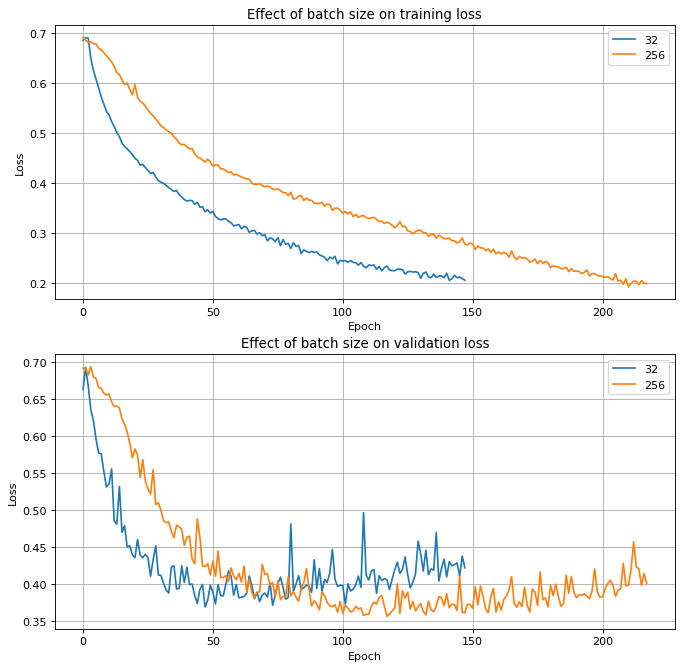

<Figure size 432x288 with 0 Axes>

In [22]:
ml_utils.plot_loss_by_param(model_state_by_batch_size_trial_1, 'batch size', 'batch_size_loss_trial_1')

In [ ]:
save_model_state(model_state_by_batch_size_trial_1, 'model_state_by_batch_size_trial_1')

In [23]:
model = ml_utils.build_model()
initial_weights = model.get_weights()
model.load_weights('pickled_objects/batch_size_32_best_weights_trial_1.h5')
batch_32_weights = model.get_weights()
model.load_weights('pickled_objects/batch_size_256_best_weights_trial_1.h5')
batch_256_weights = model.get_weights()

In [37]:
for i in range(len(initial_weights)):
    print("Parameter set:", i)
    print("\tDistance from batch 32 to initial: ", np.linalg.norm(batch_32_weights[i] - initial_weights[i]))
    print("\tDistance from batch 256 to initial: ", np.linalg.norm(batch_256_weights[i] - initial_weights[i]))

Parameter set: 0
	Distance from batch 32 to initial:  7.0809193
	Distance from batch 256 to initial:  4.9866548
Parameter set: 1
	Distance from batch 32 to initial:  1.2448872
	Distance from batch 256 to initial:  0.72424906
Parameter set: 2
	Distance from batch 32 to initial:  3.9699647
	Distance from batch 256 to initial:  3.505941
Parameter set: 3
	Distance from batch 32 to initial:  1.7034668
	Distance from batch 256 to initial:  0.6810975
Parameter set: 4
	Distance from batch 32 to initial:  6.8601875
	Distance from batch 256 to initial:  3.4972727
Parameter set: 5
	Distance from batch 32 to initial:  1.5244346
	Distance from batch 256 to initial:  0.7644117
Parameter set: 6
	Distance from batch 32 to initial:  8.274157
	Distance from batch 256 to initial:  4.067089
Parameter set: 7
	Distance from batch 32 to initial:  2.392697
	Distance from batch 256 to initial:  1.2040703
Parameter set: 8
	Distance from batch 32 to initial:  11.903623
	Distance from batch 256 to initial:  5.589

In [43]:
flattened_initial_weights = np.concatenate([x.flatten() for x in initial_weights])
flattened_32_weights = np.concatenate([x.flatten() for x in batch_32_weights])
flattened_256_weights = np.concatenate([x.flatten() for x in batch_256_weights])

In [45]:
print(
    "Distance from flattened batch 32 weights to initial weights: ",
    np.linalg.norm(flattened_32_weights - flattened_initial_weights)
)

Distance from flattened batch 32 weights to initial weights:  25.83745


In [46]:
print(
    "Distance from flattened batch 256 weights to initial weights: ",
    np.linalg.norm(flattened_256_weights - flattened_initial_weights)
)

Distance from flattened batch 256 weights to initial weights:  12.0583


In [53]:
alpha_values = np.linspace(-1, 1.5, 20)
losses = []
for alpha in alpha_values:
    print("\nTesting alpha: ", alpha)
    target_weights = [batch_256_weights[i]*alpha + batch_32_weights[i]*(1-alpha) for i in range(len(batch_32_weights))]
    model.set_weights(target_weights)
    loss, accuracy = model.evaluate(validation)
    losses.append(loss)


Testing alpha:  -1.0
     19/Unknown - 1s 40ms/step - loss: 3.9624 - accuracy: 0.5969
Testing alpha:  -0.868421052631579
     19/Unknown - 1s 36ms/step - loss: 2.4595 - accuracy: 0.6101
Testing alpha:  -0.736842105263158
     19/Unknown - 1s 36ms/step - loss: 1.5223 - accuracy: 0.6305
Testing alpha:  -0.6052631578947368
     19/Unknown - 1s 36ms/step - loss: 0.9792 - accuracy: 0.6808
Testing alpha:  -0.4736842105263158
     19/Unknown - 1s 36ms/step - loss: 0.6811 - accuracy: 0.7330
Testing alpha:  -0.3421052631578948
     19/Unknown - 1s 37ms/step - loss: 0.5017 - accuracy: 0.7863
Testing alpha:  -0.21052631578947367
     19/Unknown - 1s 36ms/step - loss: 0.4040 - accuracy: 0.8201
Testing alpha:  -0.07894736842105265
     19/Unknown - 1s 36ms/step - loss: 0.3639 - accuracy: 0.8310
Testing alpha:  0.05263157894736836
     19/Unknown - 1s 37ms/step - loss: 0.3717 - accuracy: 0.8201
Testing alpha:  0.18421052631578938
     19/Unknown - 1s 36ms/step - loss: 0.4202 - accuracy: 0.8014
Test

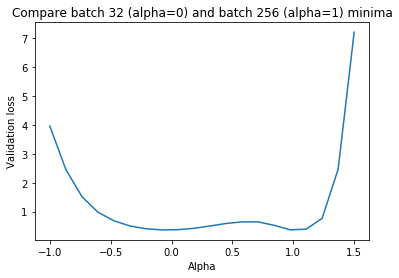

<Figure size 432x288 with 0 Axes>

In [57]:
plt.plot(alpha_values, losses)
plt.title("Compare batch 32 (alpha=0) and batch 256 (alpha=1) minima")
plt.xlabel("Alpha")
plt.ylabel("Validation loss")
plt.show()
plt.savefig('graphs/batch_size_alpha_trial_1')

## Use smaller learning rate

In [58]:
batch_sizes = [32, 256]
model_state_by_batch_size_trial_2 = {}
        
for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model(optimizer=keras.optimizers.SGD(0.02))
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
    mc = keras.callbacks.ModelCheckpoint(
        'pickled_objects/batch_size_{}_best_weights_trial_2.h5'.format(batch_size),
        monitor='val_loss',
        mode='min',
        verbose=1,
        save_best_only=True,
        save_weights_only=True
    )
    model_state_by_batch_size_trial_2[batch_size] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=10000,
        extra_callbacks=[es, mc],
    )

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/10000
    582/Unknown - 25s 43ms/step - loss: 0.6902 - accuracy: 0.5350
Saving weights for epoch 0

Epoch 00001: val_loss improved from inf to 0.68862, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 31s 54ms/step - loss: 0.6902 - accuracy: 0.5350 - val_loss: 0.6886 - val_accuracy: 0.5202
Epoch 2/10000
580/582 [============================>.] - ETA: 0s - loss: 0.6795 - accuracy: 0.5776
Epoch 00002: val_loss improved from 0.68862 to 0.68747, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.6794 - 

Epoch 23/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4633 - accuracy: 0.7781
Epoch 00023: val_loss improved from 0.45270 to 0.45264, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.4635 - accuracy: 0.7779 - val_loss: 0.4526 - val_accuracy: 0.7893
Epoch 24/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4602 - accuracy: 0.7824
Epoch 00024: val_loss improved from 0.45264 to 0.44685, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.4605 - accuracy: 0.7820 - val_loss: 0.4469 - val_accuracy: 0.7951
Epoch 25/10000
580/582 [============================>.] - ETA: 0s - loss: 0.4535 - accuracy: 0.7836
Epoch 00025: val_loss improved from 0.44685 to 0.44369, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 12s 21ms/step

Epoch 48/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3810 - accuracy: 0.8253
Epoch 00048: val_loss did not improve from 0.39124
582/582 [==============================] - 12s 21ms/step - loss: 0.3812 - accuracy: 0.8250 - val_loss: 0.3967 - val_accuracy: 0.8201
Epoch 49/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3783 - accuracy: 0.8284
Epoch 00049: val_loss improved from 0.39124 to 0.38379, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.3787 - accuracy: 0.8283 - val_loss: 0.3838 - val_accuracy: 0.8224
Epoch 50/10000
580/582 [============================>.] - ETA: 0s - loss: 0.3729 - accuracy: 0.8310
Epoch 00050: val_loss improved from 0.38379 to 0.38313, saving model to pickled_objects/batch_size_32_best_weights_trial_1.h5
582/582 [==============================] - 12s 21ms/step - loss: 0.3729 - accuracy: 0.8310 - val_loss: 0.3831 - val_accuracy: 0.821

Epoch 102/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2588 - accuracy: 0.8902
Epoch 00102: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.2590 - accuracy: 0.8902 - val_loss: 0.3678 - val_accuracy: 0.8383
Epoch 103/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2583 - accuracy: 0.8899
Epoch 00103: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.2585 - accuracy: 0.8897 - val_loss: 0.3884 - val_accuracy: 0.8263
Epoch 104/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2605 - accuracy: 0.8890
Epoch 00104: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.2602 - accuracy: 0.8890 - val_loss: 0.3767 - val_accuracy: 0.8334
Epoch 105/10000
580/582 [============================>.] - ETA: 0s - loss: 0.2577 - accuracy: 0.8884
Epoch 00105: val_loss did not improve from 0

580/582 [============================>.] - ETA: 0s - loss: 0.1730 - accuracy: 0.9318
Epoch 00158: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.1726 - accuracy: 0.9319 - val_loss: 0.4273 - val_accuracy: 0.8285
Epoch 159/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1704 - accuracy: 0.9314
Epoch 00159: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.1702 - accuracy: 0.9314 - val_loss: 0.4357 - val_accuracy: 0.8293
Epoch 160/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1765 - accuracy: 0.9279
Epoch 00160: val_loss did not improve from 0.35756
582/582 [==============================] - 12s 21ms/step - loss: 0.1769 - accuracy: 0.9277 - val_loss: 0.4142 - val_accuracy: 0.8291
Epoch 161/10000
580/582 [============================>.] - ETA: 0s - loss: 0.1668 - accuracy: 0.9340
Saving weights for epoch 160

Epoch 00161: val_loss did not 

72/73 [============================>.] - ETA: 0s - loss: 0.6672 - accuracy: 0.5995
Epoch 00015: val_loss did not improve from 0.69264
73/73 [==============================] - 8s 104ms/step - loss: 0.6670 - accuracy: 0.6000 - val_loss: 0.6963 - val_accuracy: 0.5157
Epoch 16/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6642 - accuracy: 0.6045
Saving weights for epoch 15

Epoch 00016: val_loss improved from 0.69264 to 0.69188, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 104ms/step - loss: 0.6639 - accuracy: 0.6049 - val_loss: 0.6919 - val_accuracy: 0.5277
Epoch 17/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6618 - accuracy: 0.6030
Epoch 00017: val_loss did not improve from 0.69188
73/73 [==============================] - 8s 105ms/step - loss: 0.6615 - accuracy: 0.6031 - val_loss: 0.7072 - val_accuracy: 0.5107
Epoch 18/10000
72/73 [============================>.] - ETA: 0s - loss

Epoch 40/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6357 - accuracy: 0.6321
Epoch 00040: val_loss did not improve from 0.63857
73/73 [==============================] - 8s 104ms/step - loss: 0.6357 - accuracy: 0.6322 - val_loss: 0.6422 - val_accuracy: 0.6195
Epoch 41/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6350 - accuracy: 0.6316
Saving weights for epoch 40

Epoch 00041: val_loss improved from 0.63857 to 0.63716, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 104ms/step - loss: 0.6349 - accuracy: 0.6318 - val_loss: 0.6372 - val_accuracy: 0.6262
Epoch 42/10000
72/73 [============================>.] - ETA: 0s - loss: 0.6329 - accuracy: 0.6382
Epoch 00042: val_loss did not improve from 0.63716
73/73 [==============================] - 7s 102ms/step - loss: 0.6327 - accuracy: 0.6384 - val_loss: 0.6390 - val_accuracy: 0.6227
Epoch 43/10000
72/73 [============================>.] -

Epoch 67/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5774 - accuracy: 0.6937
Epoch 00067: val_loss did not improve from 0.61423
73/73 [==============================] - 8s 104ms/step - loss: 0.5778 - accuracy: 0.6931 - val_loss: 0.6296 - val_accuracy: 0.6279
Epoch 68/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5735 - accuracy: 0.6969
Epoch 00068: val_loss did not improve from 0.61423
73/73 [==============================] - 8s 105ms/step - loss: 0.5741 - accuracy: 0.6964 - val_loss: 0.6387 - val_accuracy: 0.6249
Epoch 69/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5738 - accuracy: 0.6949
Epoch 00069: val_loss did not improve from 0.61423
73/73 [==============================] - 8s 105ms/step - loss: 0.5745 - accuracy: 0.6941 - val_loss: 0.6308 - val_accuracy: 0.6303
Epoch 70/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5716 - accuracy: 0.6934
Epoch 00070: val_loss did not improve from 0.61423
73/73 [====

Epoch 94/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5308 - accuracy: 0.7333
Epoch 00094: val_loss did not improve from 0.55753
73/73 [==============================] - 8s 105ms/step - loss: 0.5311 - accuracy: 0.7329 - val_loss: 0.5588 - val_accuracy: 0.6928
Epoch 95/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7296
Epoch 00095: val_loss did not improve from 0.55753
73/73 [==============================] - 8s 104ms/step - loss: 0.5321 - accuracy: 0.7292 - val_loss: 0.5617 - val_accuracy: 0.6933
Epoch 96/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5312 - accuracy: 0.7309
Saving weights for epoch 95

Epoch 00096: val_loss did not improve from 0.55753
73/73 [==============================] - 8s 104ms/step - loss: 0.5318 - accuracy: 0.7303 - val_loss: 0.5827 - val_accuracy: 0.6791
Epoch 97/10000
72/73 [============================>.] - ETA: 0s - loss: 0.5282 - accuracy: 0.7341
Epoch 00097: val_loss did not imp

Epoch 149/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4875 - accuracy: 0.7632
Epoch 00149: val_loss did not improve from 0.48245
73/73 [==============================] - 8s 104ms/step - loss: 0.4885 - accuracy: 0.7626 - val_loss: 0.5038 - val_accuracy: 0.7446
Epoch 150/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4861 - accuracy: 0.7611
Epoch 00150: val_loss did not improve from 0.48245
73/73 [==============================] - 8s 103ms/step - loss: 0.4868 - accuracy: 0.7608 - val_loss: 0.5185 - val_accuracy: 0.7289
Epoch 151/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4830 - accuracy: 0.7660
Saving weights for epoch 150

Epoch 00151: val_loss did not improve from 0.48245
73/73 [==============================] - 8s 103ms/step - loss: 0.4834 - accuracy: 0.7659 - val_loss: 0.5031 - val_accuracy: 0.7444
Epoch 152/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4838 - accuracy: 0.7622
Epoch 00152: val_loss did no

Epoch 205/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4574 - accuracy: 0.7798
Epoch 00205: val_loss did not improve from 0.45063
73/73 [==============================] - 8s 104ms/step - loss: 0.4576 - accuracy: 0.7800 - val_loss: 0.4823 - val_accuracy: 0.7582
Epoch 206/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4528 - accuracy: 0.7817
Saving weights for epoch 205

Epoch 00206: val_loss improved from 0.45063 to 0.45034, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 105ms/step - loss: 0.4534 - accuracy: 0.7813 - val_loss: 0.4503 - val_accuracy: 0.7771
Epoch 207/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4561 - accuracy: 0.7829
Epoch 00207: val_loss did not improve from 0.45034
73/73 [==============================] - 8s 105ms/step - loss: 0.4566 - accuracy: 0.7829 - val_loss: 0.5213 - val_accuracy: 0.7311
Epoch 208/10000
72/73 [============================

Epoch 233/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4397 - accuracy: 0.7935
Epoch 00233: val_loss did not improve from 0.44169
73/73 [==============================] - 8s 105ms/step - loss: 0.4400 - accuracy: 0.7936 - val_loss: 0.4647 - val_accuracy: 0.7678
Epoch 234/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4454 - accuracy: 0.7869
Epoch 00234: val_loss did not improve from 0.44169
73/73 [==============================] - 8s 105ms/step - loss: 0.4454 - accuracy: 0.7872 - val_loss: 0.4659 - val_accuracy: 0.7661
Epoch 235/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4442 - accuracy: 0.7860
Epoch 00235: val_loss did not improve from 0.44169
73/73 [==============================] - 8s 103ms/step - loss: 0.4447 - accuracy: 0.7856 - val_loss: 0.4479 - val_accuracy: 0.7820
Epoch 236/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4429 - accuracy: 0.7923
Saving weights for epoch 235

Epoch 00236: val_loss did no

72/73 [============================>.] - ETA: 0s - loss: 0.4143 - accuracy: 0.8059
Epoch 00288: val_loss did not improve from 0.41883
73/73 [==============================] - 8s 104ms/step - loss: 0.4148 - accuracy: 0.8056 - val_loss: 0.4962 - val_accuracy: 0.7491
Epoch 289/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4189 - accuracy: 0.8028
Epoch 00289: val_loss did not improve from 0.41883
73/73 [==============================] - 8s 105ms/step - loss: 0.4189 - accuracy: 0.8030 - val_loss: 0.4533 - val_accuracy: 0.7767
Epoch 290/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4215 - accuracy: 0.8043
Epoch 00290: val_loss did not improve from 0.41883
73/73 [==============================] - 8s 104ms/step - loss: 0.4220 - accuracy: 0.8040 - val_loss: 0.4352 - val_accuracy: 0.7908
Epoch 291/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4192 - accuracy: 0.8018
Saving weights for epoch 290

Epoch 00291: val_loss did not improve from 0

Epoch 316/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4071 - accuracy: 0.8099
Saving weights for epoch 315

Epoch 00316: val_loss did not improve from 0.40701
73/73 [==============================] - 8s 105ms/step - loss: 0.4077 - accuracy: 0.8098 - val_loss: 0.4232 - val_accuracy: 0.7969
Epoch 317/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4129 - accuracy: 0.8070
Epoch 00317: val_loss did not improve from 0.40701
73/73 [==============================] - 8s 105ms/step - loss: 0.4131 - accuracy: 0.8069 - val_loss: 0.4230 - val_accuracy: 0.7960
Epoch 318/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.8103
Epoch 00318: val_loss did not improve from 0.40701
73/73 [==============================] - 8s 105ms/step - loss: 0.4067 - accuracy: 0.8103 - val_loss: 0.4310 - val_accuracy: 0.7902
Epoch 319/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4081 - accuracy: 0.8083
Epoch 00319: val_loss did no

Epoch 344/10000
72/73 [============================>.] - ETA: 0s - loss: 0.4022 - accuracy: 0.8123
Epoch 00344: val_loss did not improve from 0.40157
73/73 [==============================] - 7s 103ms/step - loss: 0.4030 - accuracy: 0.8119 - val_loss: 0.4064 - val_accuracy: 0.8132
Epoch 345/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3929 - accuracy: 0.8155
Epoch 00345: val_loss did not improve from 0.40157
73/73 [==============================] - 8s 103ms/step - loss: 0.3931 - accuracy: 0.8153 - val_loss: 0.4068 - val_accuracy: 0.8091
Epoch 346/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3930 - accuracy: 0.8193
Saving weights for epoch 345

Epoch 00346: val_loss did not improve from 0.40157
73/73 [==============================] - 8s 105ms/step - loss: 0.3938 - accuracy: 0.8189 - val_loss: 0.4023 - val_accuracy: 0.8147
Epoch 347/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3964 - accuracy: 0.8134
Epoch 00347: val_loss improv

Epoch 372/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3876 - accuracy: 0.8204
Epoch 00372: val_loss improved from 0.39657 to 0.39076, saving model to pickled_objects/batch_size_256_best_weights_trial_1.h5
73/73 [==============================] - 8s 106ms/step - loss: 0.3887 - accuracy: 0.8202 - val_loss: 0.3908 - val_accuracy: 0.8188
Epoch 373/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3842 - accuracy: 0.8208
Epoch 00373: val_loss did not improve from 0.39076
73/73 [==============================] - 8s 103ms/step - loss: 0.3844 - accuracy: 0.8207 - val_loss: 0.4138 - val_accuracy: 0.8085
Epoch 374/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3869 - accuracy: 0.8206
Epoch 00374: val_loss did not improve from 0.39076
73/73 [==============================] - 8s 104ms/step - loss: 0.3873 - accuracy: 0.8205 - val_loss: 0.3972 - val_accuracy: 0.8186
Epoch 375/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3821 -

Epoch 400/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3749 - accuracy: 0.8293
Epoch 00400: val_loss did not improve from 0.38848
73/73 [==============================] - 8s 104ms/step - loss: 0.3754 - accuracy: 0.8293 - val_loss: 0.4006 - val_accuracy: 0.8151
Epoch 401/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3723 - accuracy: 0.8324
Saving weights for epoch 400

Epoch 00401: val_loss did not improve from 0.38848
73/73 [==============================] - 8s 105ms/step - loss: 0.3729 - accuracy: 0.8320 - val_loss: 0.3890 - val_accuracy: 0.8239
Epoch 402/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3726 - accuracy: 0.8290
Epoch 00402: val_loss did not improve from 0.38848
73/73 [==============================] - 8s 105ms/step - loss: 0.3729 - accuracy: 0.8289 - val_loss: 0.4020 - val_accuracy: 0.8149
Epoch 403/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3730 - accuracy: 0.8281
Epoch 00403: val_loss did no

Epoch 428/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3598 - accuracy: 0.8355
Epoch 00428: val_loss did not improve from 0.38433
73/73 [==============================] - 8s 104ms/step - loss: 0.3603 - accuracy: 0.8355 - val_loss: 0.3869 - val_accuracy: 0.8237
Epoch 429/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3615 - accuracy: 0.8354
Epoch 00429: val_loss did not improve from 0.38433
73/73 [==============================] - 8s 104ms/step - loss: 0.3612 - accuracy: 0.8356 - val_loss: 0.3982 - val_accuracy: 0.8175
Epoch 430/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3602 - accuracy: 0.8364
Epoch 00430: val_loss did not improve from 0.38433
73/73 [==============================] - 8s 103ms/step - loss: 0.3609 - accuracy: 0.8363 - val_loss: 0.3991 - val_accuracy: 0.8164
Epoch 431/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3639 - accuracy: 0.8314
Saving weights for epoch 430

Epoch 00431: val_loss did no

Epoch 457/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3508 - accuracy: 0.8395
Epoch 00457: val_loss did not improve from 0.38433
73/73 [==============================] - 8s 104ms/step - loss: 0.3513 - accuracy: 0.8394 - val_loss: 0.3858 - val_accuracy: 0.8244
Epoch 458/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3489 - accuracy: 0.8430
Epoch 00458: val_loss did not improve from 0.38433
73/73 [==============================] - 8s 105ms/step - loss: 0.3494 - accuracy: 0.8427 - val_loss: 0.3944 - val_accuracy: 0.8184
Epoch 459/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3516 - accuracy: 0.8427
Epoch 00459: val_loss did not improve from 0.38433
73/73 [==============================] - 8s 104ms/step - loss: 0.3517 - accuracy: 0.8428 - val_loss: 0.4100 - val_accuracy: 0.8091
Epoch 460/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3486 - accuracy: 0.8419
Epoch 00460: val_loss improved from 0.38433 to 0.38427, sa

Epoch 485/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3415 - accuracy: 0.8447
Epoch 00485: val_loss did not improve from 0.38008
73/73 [==============================] - 7s 103ms/step - loss: 0.3416 - accuracy: 0.8450 - val_loss: 0.3914 - val_accuracy: 0.8214
Epoch 486/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3409 - accuracy: 0.8441
Saving weights for epoch 485

Epoch 00486: val_loss did not improve from 0.38008
73/73 [==============================] - 8s 104ms/step - loss: 0.3412 - accuracy: 0.8442 - val_loss: 0.4228 - val_accuracy: 0.8003
Epoch 487/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3441 - accuracy: 0.8428
Epoch 00487: val_loss did not improve from 0.38008
73/73 [==============================] - 8s 104ms/step - loss: 0.3439 - accuracy: 0.8428 - val_loss: 0.3819 - val_accuracy: 0.8250
Epoch 488/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3399 - accuracy: 0.8477
Epoch 00488: val_loss did no

Epoch 542/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3215 - accuracy: 0.8575
Epoch 00542: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 104ms/step - loss: 0.3208 - accuracy: 0.8574 - val_loss: 0.3888 - val_accuracy: 0.8186
Epoch 543/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3160 - accuracy: 0.8611
Epoch 00543: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 105ms/step - loss: 0.3159 - accuracy: 0.8610 - val_loss: 0.3911 - val_accuracy: 0.8164
Epoch 544/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3137 - accuracy: 0.8614
Epoch 00544: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 105ms/step - loss: 0.3142 - accuracy: 0.8612 - val_loss: 0.3861 - val_accuracy: 0.8181
Epoch 545/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3135 - accuracy: 0.8614
Epoch 00545: val_loss did not improve from 0.37859
73/73 [

Epoch 571/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3064 - accuracy: 0.8660
Saving weights for epoch 570

Epoch 00571: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 105ms/step - loss: 0.3056 - accuracy: 0.8660 - val_loss: 0.4049 - val_accuracy: 0.8134
Epoch 572/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3009 - accuracy: 0.8644
Epoch 00572: val_loss did not improve from 0.37859
73/73 [==============================] - 7s 103ms/step - loss: 0.3009 - accuracy: 0.8644 - val_loss: 0.3947 - val_accuracy: 0.8162
Epoch 573/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3051 - accuracy: 0.8649
Epoch 00573: val_loss did not improve from 0.37859
73/73 [==============================] - 8s 103ms/step - loss: 0.3050 - accuracy: 0.8651 - val_loss: 0.4198 - val_accuracy: 0.8063
Epoch 574/10000
72/73 [============================>.] - ETA: 0s - loss: 0.3036 - accuracy: 0.8664
Epoch 00574: val_loss did no

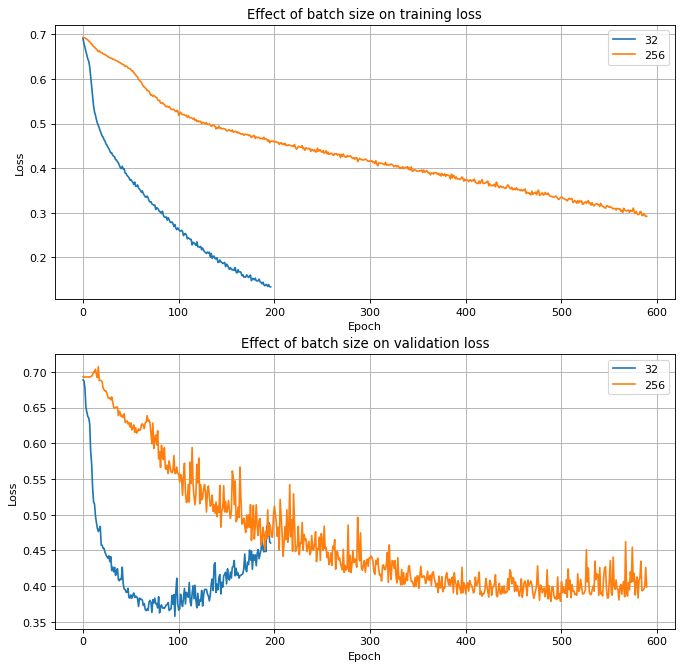

<Figure size 432x288 with 0 Axes>

In [59]:
ml_utils.plot_loss_by_param(model_state_by_batch_size_trial_2, 'batch size', 'batch_size_loss_trial_2')

In [ ]:
save_model_state(model_state_by_batch_size_trial_2, 'model_state_by_batch_size_trial_2')

In [82]:
model = ml_utils.build_model()
initial_weights = model.get_weights()
model.load_weights('pickled_objects/batch_size_32_best_weights_trial_2.h5')
batch_32_weights = model.get_weights()
model.load_weights('pickled_objects/batch_size_256_best_weights_trial_2.h5')
batch_256_weights = model.get_weights()

In [83]:
for i in range(len(initial_weights)):
    print("Parameter set:", i)
    print("\tDistance from batch 32 to initial: ", np.linalg.norm(batch_32_weights[i] - initial_weights[i]))
    print("\tDistance from batch 256 to initial: ", np.linalg.norm(batch_256_weights[i] - initial_weights[i]))

Parameter set: 0
	Distance from batch 32 to initial:  5.4449635
	Distance from batch 256 to initial:  3.971358
Parameter set: 1
	Distance from batch 32 to initial:  0.4515521
	Distance from batch 256 to initial:  0.6010699
Parameter set: 2
	Distance from batch 32 to initial:  3.6385295
	Distance from batch 256 to initial:  3.0198355
Parameter set: 3
	Distance from batch 32 to initial:  0.7692873
	Distance from batch 256 to initial:  0.37877738
Parameter set: 4
	Distance from batch 32 to initial:  3.9281173
	Distance from batch 256 to initial:  3.204115
Parameter set: 5
	Distance from batch 32 to initial:  0.8728317
	Distance from batch 256 to initial:  0.3926258
Parameter set: 6
	Distance from batch 32 to initial:  5.157456
	Distance from batch 256 to initial:  3.3155155
Parameter set: 7
	Distance from batch 32 to initial:  1.6288005
	Distance from batch 256 to initial:  0.80456364
Parameter set: 8
	Distance from batch 32 to initial:  7.22961
	Distance from batch 256 to initial:  4.524

In [85]:
flattened_initial_weights = np.concatenate([x.flatten() for x in initial_weights])
flattened_32_weights = np.concatenate([x.flatten() for x in batch_32_weights])
flattened_256_weights = np.concatenate([x.flatten() for x in batch_256_weights])

In [86]:
print(
    "Distance from flattened batch 32 weights to initial weights: ",
    np.linalg.norm(flattened_32_weights - flattened_initial_weights)
)

Distance from flattened batch 32 weights to initial weights:  15.1988735


In [87]:
print(
    "Distance from flattened batch 256 weights to initial weights: ",
    np.linalg.norm(flattened_256_weights - flattened_initial_weights)
)

Distance from flattened batch 256 weights to initial weights:  10.045458


In [90]:
alpha_values = np.linspace(-1, 2, 20)
losses = []
for alpha in alpha_values:
    print("\nTesting alpha: ", alpha)
    target_weights = [batch_256_weights[i]*alpha + batch_32_weights[i]*(1-alpha) for i in range(len(batch_32_weights))]
    model.set_weights(target_weights)
    loss, accuracy = model.evaluate(validation)
    losses.append(loss)


Testing alpha:  -1.0
     19/Unknown - 1s 40ms/step - loss: 4.2534 - accuracy: 0.5365
Testing alpha:  -0.8421052631578947
     19/Unknown - 1s 36ms/step - loss: 2.4581 - accuracy: 0.5815
Testing alpha:  -0.6842105263157895
     19/Unknown - 1s 36ms/step - loss: 1.3630 - accuracy: 0.6423
Testing alpha:  -0.5263157894736843
     19/Unknown - 1s 37ms/step - loss: 0.7839 - accuracy: 0.7259
Testing alpha:  -0.368421052631579
     19/Unknown - 1s 35ms/step - loss: 0.5164 - accuracy: 0.8012
Testing alpha:  -0.21052631578947367
     19/Unknown - 1s 36ms/step - loss: 0.4049 - accuracy: 0.8298
Testing alpha:  -0.052631578947368474
     19/Unknown - 1s 36ms/step - loss: 0.3587 - accuracy: 0.8435
Testing alpha:  0.10526315789473673
     19/Unknown - 1s 36ms/step - loss: 0.3571 - accuracy: 0.8375
Testing alpha:  0.26315789473684204
     19/Unknown - 1s 37ms/step - loss: 0.3916 - accuracy: 0.8175
Testing alpha:  0.42105263157894735
     19/Unknown - 1s 36ms/step - loss: 0.4421 - accuracy: 0.7939
Te

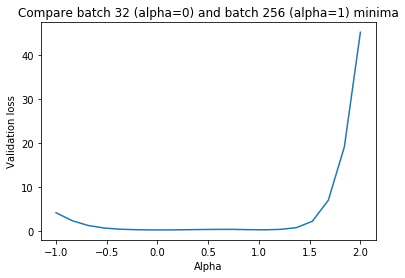

<Figure size 432x288 with 0 Axes>

In [91]:
plt.plot(alpha_values, losses)
plt.title("Compare batch 32 (alpha=0) and batch 256 (alpha=1) minima")
plt.xlabel("Alpha")
plt.ylabel("Validation loss")
plt.show()
plt.savefig('graphs/batch_size_alpha_trial_2')

**Conclusion so far**: Performance on batch size is sensitive to the learning rate. Lower learning rates are better for smaller batch sizes.

## Why do large batch sizes converge more slowly?

In [3]:
class WeightHistory(keras.callbacks.Callback):
    def __init__(self):
        self.weights_per_epoch = []
        self.weights_per_batch = []
    
    def on_train_begin(self, logs={}):
        self.weights_per_epoch.append(self.model.get_weights())
        self.weights_per_batch.append(self.model.get_weights())

    def on_batch_end(self, batch, logs={}):
        self.weights_per_batch.append(self.model.get_weights())
        
    def on_epoch_end(self, epoch, logs={}):
        self.weights_per_epoch.append(self.model.get_weights())


In [4]:
batch_sizes = [32, 256]
model_state_by_batch_size_trial_3 = {}
weight_history_by_batch_size_trial_3 = {}

for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model(optimizer=keras.optimizers.SGD(0.02))
    wh = WeightHistory()
    model_state_by_batch_size_trial_3[batch_size] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=10,
        extra_callbacks=[wh],
    )
    weight_history_by_batch_size_trial_3[batch_size] = wh

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/10
582/582 [==============================] - 37s 64ms/step - loss: 0.6902 - accuracy: 0.5350 - val_loss: 0.6886 - val_accuracy: 0.5202
Epoch 2/10
582/582 [==============================] - 16s 27ms/step - loss: 0.6794 - accuracy: 0.5775 - val_loss: 0.6875 - val_accuracy: 0.5252
Epoch 3/10
582/582 [==============================] - 16s 27ms/step - loss: 0.6709 - accuracy: 0.5879 - val_loss: 0.6768 - val_accuracy: 0.5699
Epoch 4/10
582/582 [==============================] - 17s 29ms/step - loss: 0.6619 - accuracy: 0.6026 - val_loss: 0.6507 - val_accuracy: 0.6320
Epoch 5/10
582/582 [==============================] - 16s 27ms/step - loss: 0.6530 - a

In [47]:
# For the last layer, compute the distance between between epoch weights and epoch+1 weights
epoch_update_magnitudes_by_batch_size = {}
for batch_size in batch_sizes:
    epoch_update_magnitudes_by_batch_size[batch_size] = []
    weights_per_epoch = weight_history_by_batch_size_trial_3[batch_size].weights_per_epoch
    for i in range(len(weights_per_epoch)-1):
        curr_epoch_weights = weights_per_epoch[i][-2].flatten()
        next_epoch_weights = weights_per_epoch[i+1][-2].flatten()
        epoch_update_magnitudes_by_batch_size[batch_size].append(np.linalg.norm(next_epoch_weights - curr_epoch_weights))

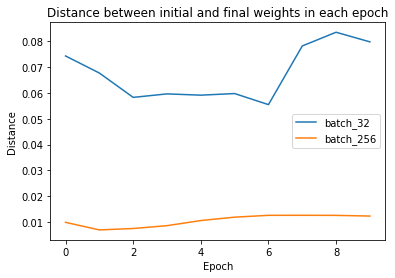

In [48]:
plt.figure()
plt.plot(epoch_update_magnitudes_by_batch_size[32], label='batch_32')
plt.plot(epoch_update_magnitudes_by_batch_size[256], label='batch_256')
plt.xlabel('Epoch')
plt.ylabel('Distance')
plt.legend()
plt.title('Distance between initial and final weights in each epoch')
plt.show()

In [49]:
# For the last layer, compute the distance between between epoch weights and epoch+1 weights
batch_update_magnitudes_by_batch_size = {}
for batch_size in batch_sizes:
    batch_update_magnitudes_by_batch_size[batch_size] = []
    weights_per_batch = weight_history_by_batch_size_trial_3[batch_size].weights_per_batch
    for i in range(len(weights_per_batch)-1):
        curr_batch_weights = weights_per_batch[i][-2].flatten()
        next_batch_weights = weights_per_batch[i+1][-2].flatten()
        batch_update_magnitudes_by_batch_size[batch_size].append(np.linalg.norm(next_batch_weights - curr_batch_weights))

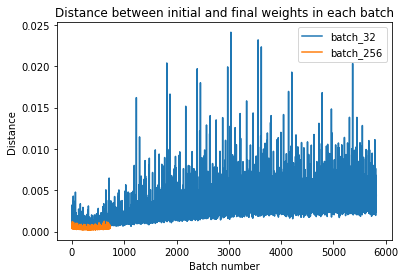

In [41]:
plt.figure()
plt.plot(batch_update_magnitudes_by_batch_size[32], label='batch_32')
plt.plot(batch_update_magnitudes_by_batch_size[256], label='batch_256')
plt.xlabel('Batch number')
plt.ylabel('Distance')
plt.legend()
plt.title('Distance between initial and final weights in each batch')
plt.show()

In [44]:
print("Average batch update norm for batch size 32: ", np.mean(batch_update_magnitudes_by_batch_size[32]))
print("Average batch update norm for batch size 256: ", np.mean(batch_update_magnitudes_by_batch_size[256]))

Average batch update norm for batch size 32:  0.0032435427
Average batch update norm for batch size 256:  0.00043920582


The ratio of the batch update sizes is almost exactly the inverse of the batch size ratio. This explains why batch size 256 converges so much more slowly: not only is it making fewer updates, but each update is also smaller.

## Old runs

In [80]:
from sklearn.manifold import TSNE

weights_across_epochs = []
for epoch, weights in model_state_by_batch_size_trial_1[32].weights_by_epoch.items():
    weights_across_epochs.append(weights[-2].flatten())
tsne = TSNE(n_components=2, verbose=1)
transformed_weights = tsne.fit_transform(weights_across_epochs)

[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.379154
[t-SNE] KL divergence after 1000 iterations: 0.501490


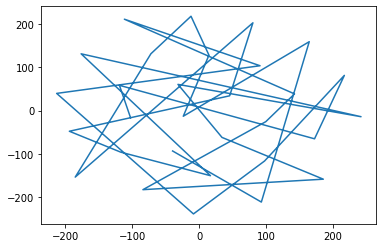

In [81]:
plt.plot(transformed_weights[:,0], transformed_weights[:,1])
plt.show()

In [3]:
batch_sizes = [32, 128, 512]
model_state_by_batch_size_trial_1 = {}

for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model()
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
    mc = ModelCheckpoint(
        'pickled_objects/batch_size_{}_trial_1_weights.h5'.format(batch_size),
        monitor='val_loss',
        mode='min',
        verbose=1,
        save_best_only=True,
        save_weights_only=True
    )
    model_state_by_batch_size_trial_1[batch_size] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=1500,
        extra_callbacks=[es, mc],
    )

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/1500
    582/Unknown - 27s 46ms/step - loss: 0.6860 - accuracy: 0.5435
Saving weights for epoch 0
582/582 [==============================] - 33s 57ms/step - loss: 0.6860 - accuracy: 0.5435 - val_loss: 0.6627 - val_accuracy: 0.6279
Epoch 2/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.6911 - accuracy: 0.5155 - val_loss: 0.6928 - val_accuracy: 0.5099
Epoch 3/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.6900 - accuracy: 0.5264 - val_loss: 0.6677 - val_accuracy: 0.6131
Epoch 4/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.6494 - accuracy: 0.6271 - val_loss: 0.6357 - val_ac

Epoch 47/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.3523 - accuracy: 0.8424 - val_loss: 0.3995 - val_accuracy: 0.8164
Epoch 48/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.3422 - accuracy: 0.8476 - val_loss: 0.3691 - val_accuracy: 0.8261
Epoch 49/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.3462 - accuracy: 0.8440 - val_loss: 0.3781 - val_accuracy: 0.8214
Epoch 50/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.3397 - accuracy: 0.8486 - val_loss: 0.3985 - val_accuracy: 0.8126
Epoch 51/1500
580/582 [============================>.] - ETA: 0s - loss: 0.3430 - accuracy: 0.8477
Saving weights for epoch 50
582/582 [==============================] - 12s 21ms/step - loss: 0.3431 - accuracy: 0.8475 - val_loss: 0.3889 - val_accuracy: 0.8222
Epoch 52/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.3328 - accuracy: 0.8495 - val_loss: 0.3731 - val_accuracy: 0.8265
Epoch

Epoch 96/1500
580/582 [============================>.] - ETA: 0s - loss: 0.2509 - accuracy: 0.8962
Saving weights for epoch 95
582/582 [==============================] - 12s 21ms/step - loss: 0.2512 - accuracy: 0.8961 - val_loss: 0.4149 - val_accuracy: 0.8138
Epoch 97/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2482 - accuracy: 0.8976 - val_loss: 0.4469 - val_accuracy: 0.8042
Epoch 98/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2530 - accuracy: 0.8927 - val_loss: 0.4063 - val_accuracy: 0.8188
Epoch 99/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2378 - accuracy: 0.9014 - val_loss: 0.3968 - val_accuracy: 0.8248
Epoch 100/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2451 - accuracy: 0.8955 - val_loss: 0.3981 - val_accuracy: 0.8285
Epoch 101/1500
580/582 [============================>.] - ETA: 0s - loss: 0.2434 - accuracy: 0.9038
Saving weights for epoch 100
582/582 [=============

Epoch 144/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2150 - accuracy: 0.9119 - val_loss: 0.4260 - val_accuracy: 0.8020
Epoch 145/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2101 - accuracy: 0.9164 - val_loss: 0.4286 - val_accuracy: 0.8164
Epoch 146/1500
580/582 [============================>.] - ETA: 0s - loss: 0.2115 - accuracy: 0.9159
Saving weights for epoch 145
582/582 [==============================] - 12s 21ms/step - loss: 0.2113 - accuracy: 0.9160 - val_loss: 0.4109 - val_accuracy: 0.8153
Epoch 147/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2081 - accuracy: 0.9143 - val_loss: 0.4378 - val_accuracy: 0.8227
Epoch 148/1500
582/582 [==============================] - 12s 21ms/step - loss: 0.2049 - accuracy: 0.9173 - val_loss: 0.4219 - val_accuracy: 0.8237
Epoch 00148: early stopping
Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::

Epoch 42/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.3898 - accuracy: 0.8211 - val_loss: 0.4042 - val_accuracy: 0.8055
Epoch 43/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.3886 - accuracy: 0.8207 - val_loss: 0.4051 - val_accuracy: 0.8087
Epoch 44/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.3861 - accuracy: 0.8230 - val_loss: 0.4191 - val_accuracy: 0.8040
Epoch 45/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.3816 - accuracy: 0.8245 - val_loss: 0.3921 - val_accuracy: 0.8143
Epoch 46/1500
144/146 [============================>.] - ETA: 0s - loss: 0.3755 - accuracy: 0.8304 ETA: 
Saving weights for epoch 45
146/146 [==============================] - 8s 56ms/step - loss: 0.3757 - accuracy: 0.8302 - val_loss: 0.4069 - val_accuracy: 0.8048
Epoch 47/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.3818 - accuracy: 0.8263 - val_loss: 0.3898 - val_accuracy: 0.8199
Epoch

145/146 [============================>.] - ETA: 0s - loss: 0.2708 - accuracy: 0.8829
Saving weights for epoch 90
146/146 [==============================] - 8s 56ms/step - loss: 0.2701 - accuracy: 0.8831 - val_loss: 0.3762 - val_accuracy: 0.8285
Epoch 92/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.2599 - accuracy: 0.8898 - val_loss: 0.4021 - val_accuracy: 0.8218
Epoch 93/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.2639 - accuracy: 0.8849 - val_loss: 0.3738 - val_accuracy: 0.8293
Epoch 94/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.2650 - accuracy: 0.8852 - val_loss: 0.3639 - val_accuracy: 0.8336
Epoch 95/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.2557 - accuracy: 0.8912 - val_loss: 0.3869 - val_accuracy: 0.8343
Epoch 96/1500
144/146 [============================>.] - ETA: 0s - loss: 0.2526 - accuracy: 0.8899 ETA: 0s - loss: 0
Saving weights for epoch 95
146/146 [=================

Epoch 139/1500
146/146 [==============================] - 8s 57ms/step - loss: 0.1809 - accuracy: 0.9231 - val_loss: 0.4211 - val_accuracy: 0.8216
Epoch 140/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.1848 - accuracy: 0.9234 - val_loss: 0.4026 - val_accuracy: 0.8308
Epoch 141/1500
144/146 [============================>.] - ETA: 0s - loss: 0.1754 - accuracy: 0.9295
Saving weights for epoch 140
146/146 [==============================] - 8s 57ms/step - loss: 0.1753 - accuracy: 0.9294 - val_loss: 0.4578 - val_accuracy: 0.8102
Epoch 142/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.1830 - accuracy: 0.9250 - val_loss: 0.4445 - val_accuracy: 0.8203
Epoch 143/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.1721 - accuracy: 0.9300 - val_loss: 0.4417 - val_accuracy: 0.8239
Epoch 144/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.1731 - accuracy: 0.9281 - val_loss: 0.4341 - val_accuracy: 0.8222
Epoc

Epoch 187/1500
146/146 [==============================] - 8s 57ms/step - loss: 0.1314 - accuracy: 0.9490 - val_loss: 0.4667 - val_accuracy: 0.8201
Epoch 188/1500
146/146 [==============================] - 8s 57ms/step - loss: 0.1328 - accuracy: 0.9478 - val_loss: 0.4988 - val_accuracy: 0.8083
Epoch 189/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.1388 - accuracy: 0.9454 - val_loss: 0.4462 - val_accuracy: 0.8282
Epoch 190/1500
146/146 [==============================] - 8s 56ms/step - loss: 0.1318 - accuracy: 0.9462 - val_loss: 0.4596 - val_accuracy: 0.8278
Epoch 191/1500
145/146 [============================>.] - ETA: 0s - loss: 0.1262 - accuracy: 0.9498
Saving weights for epoch 190
146/146 [==============================] - 8s 57ms/step - loss: 0.1259 - accuracy: 0.9499 - val_loss: 0.4933 - val_accuracy: 0.8033
Epoch 192/1500
146/146 [==============================] - 8s 57ms/step - loss: 0.1344 - accuracy: 0.9492 - val_loss: 0.4917 - val_accuracy: 0.8209
Epoc

Epoch 89/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.4542 - accuracy: 0.7836 - val_loss: 0.4479 - val_accuracy: 0.7861
Epoch 90/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.4520 - accuracy: 0.7855 - val_loss: 0.4451 - val_accuracy: 0.7853
Epoch 91/1500
36/37 [============================>.] - ETA: 0s - loss: 0.4475 - accuracy: 0.7874
Saving weights for epoch 90
37/37 [==============================] - 7s 196ms/step - loss: 0.4478 - accuracy: 0.7874 - val_loss: 0.5100 - val_accuracy: 0.7438
Epoch 92/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.4510 - accuracy: 0.7858 - val_loss: 0.4266 - val_accuracy: 0.8003
Epoch 93/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.4545 - accuracy: 0.7818 - val_loss: 0.4413 - val_accuracy: 0.7900
Epoch 94/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.4429 - accuracy: 0.7887 - val_loss: 0.4343 - val_accuracy: 0.7928
Epoch 95/1500
37/37

36/37 [============================>.] - ETA: 0s - loss: 0.3458 - accuracy: 0.8442
Saving weights for epoch 185
37/37 [==============================] - 7s 197ms/step - loss: 0.3424 - accuracy: 0.8451 - val_loss: 0.3608 - val_accuracy: 0.8356
Epoch 187/1500
37/37 [==============================] - 7s 197ms/step - loss: 0.3400 - accuracy: 0.8444 - val_loss: 0.3568 - val_accuracy: 0.8347
Epoch 188/1500
37/37 [==============================] - 7s 197ms/step - loss: 0.3398 - accuracy: 0.8474 - val_loss: 0.3724 - val_accuracy: 0.8272
Epoch 189/1500
37/37 [==============================] - 7s 197ms/step - loss: 0.3468 - accuracy: 0.8433 - val_loss: 0.3686 - val_accuracy: 0.8280
Epoch 190/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.3404 - accuracy: 0.8452 - val_loss: 0.3770 - val_accuracy: 0.8252
Epoch 191/1500
36/37 [============================>.] - ETA: 0s - loss: 0.3394 - accuracy: 0.8474
Saving weights for epoch 190
37/37 [==============================] - 7s 19

37/37 [==============================] - 7s 198ms/step - loss: 0.2675 - accuracy: 0.8824 - val_loss: 0.3805 - val_accuracy: 0.8209
Epoch 283/1500
37/37 [==============================] - 7s 197ms/step - loss: 0.2583 - accuracy: 0.8864 - val_loss: 0.3672 - val_accuracy: 0.8285
Epoch 284/1500
37/37 [==============================] - 7s 197ms/step - loss: 0.2533 - accuracy: 0.8868 - val_loss: 0.3456 - val_accuracy: 0.8457
Epoch 285/1500
37/37 [==============================] - 7s 198ms/step - loss: 0.2540 - accuracy: 0.8908 - val_loss: 0.3546 - val_accuracy: 0.8392
Epoch 286/1500
36/37 [============================>.] - ETA: 0s - loss: 0.2576 - accuracy: 0.8886
Saving weights for epoch 285
37/37 [==============================] - 7s 197ms/step - loss: 0.2556 - accuracy: 0.8889 - val_loss: 0.3566 - val_accuracy: 0.8338
Epoch 287/1500
37/37 [==============================] - 7s 196ms/step - loss: 0.2496 - accuracy: 0.8940 - val_loss: 0.3552 - val_accuracy: 0.8392
Epoch 288/1500
37/37 [=====

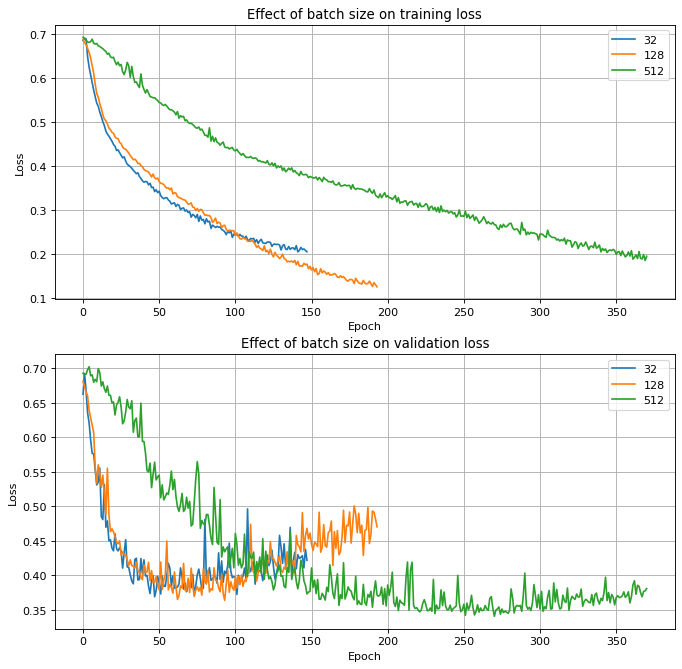

<Figure size 432x288 with 0 Axes>

In [4]:
ml_utils.plot_loss_by_param(model_state_by_batch_size_trial_1, 'batch size', 'batch_size_loss_trial_1')

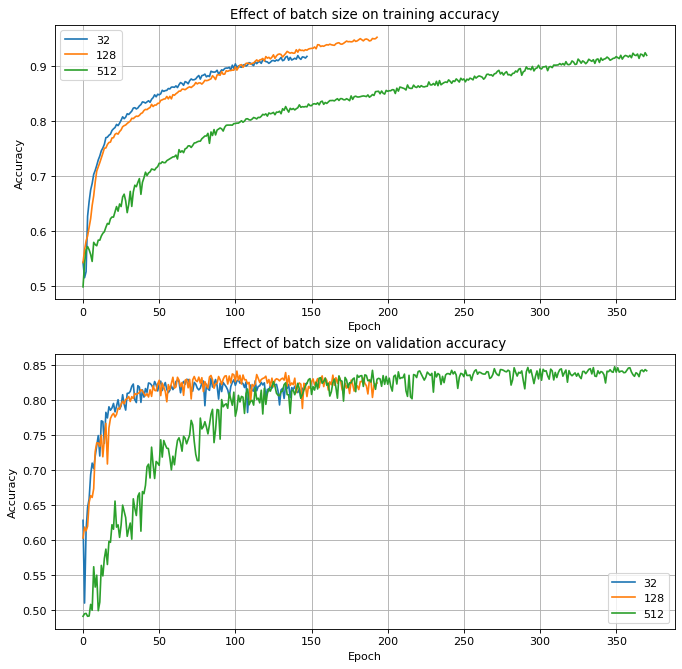

<Figure size 432x288 with 0 Axes>

In [6]:
ml_utils.plot_accuracies_by_param(model_state_by_batch_size_trial_1, 'batch size', 'batch_size_accuracy_trial_1')

In [8]:
ml_utils.save_model_state(model_state_by_batch_size_trial_1, 'model_state_by_batch_size_trial_1')

Surprisingly, batch sizes 32 and 128 performed worse than 512. Could this be because the learning rate is too high? Let's try a lower learning rate of 0.01.

In [10]:
batch_sizes = [32, 128, 512]
model_state_by_batch_size_trial_2 = {}

for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model(optimizer=keras.optimizers.SGD(learning_rate=0.01))
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
    model_state_by_batch_size_trial_2[batch_size] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=10000,
        extra_callbacks=[es],
    )

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/10000
    582/Unknown - 25s 43ms/step - loss: 0.6926 - accuracy: 0.5135
Saving weights for epoch 0
582/582 [==============================] - 31s 54ms/step - loss: 0.6926 - accuracy: 0.5135 - val_loss: 0.6919 - val_accuracy: 0.4963
Epoch 2/10000
582/582 [==============================] - 12s 21ms/step - loss: 0.6869 - accuracy: 0.5651 - val_loss: 0.6902 - val_accuracy: 0.5045
Epoch 3/10000
582/582 [==============================] - 12s 21ms/step - loss: 0.6785 - accuracy: 0.5801 - val_loss: 0.6920 - val_accuracy: 0.5103
Epoch 4/10000
582/582 [==============================] - 12s 21ms/step - loss: 0.6716 - accuracy: 0.5861 - val_loss: 0.6793 - va

KeyboardInterrupt: 

Since batch size 8 performed poorly, the learning rate may be too high for small batch sizes. On the other hand, 32 and 128 didn't converge, so we may need to up the number of epochs. So, let's try a lower learning rate and more epochs.

In [10]:
batch_sizes = [8, 32, 128, 512, 2048]
model_state_by_type_trial_2 = {}

for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model(optimizer=keras.optimizers.SGD(learning_rate=0.05))
    model_state_by_type_trial_2[batch_size] = ml_utils.train_model(model, train, validation, epochs=100)

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/100
2327/2327 [==============================] - 55s 24ms/step - loss: 0.6840 - accuracy: 0.5558 - val_loss: 0.6565 - val_accuracy: 0.6187
Epoch 2/100
2327/2327 [==============================] - 28s 12ms/step - loss: 0.6485 - accuracy: 0.6257 - val_loss: 0.6115 - val_accuracy: 0.6829
Epoch 3/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.6004 - accuracy: 0.6779 - val_loss: 0.5513 - val_accuracy: 0.7291
Epoch 4/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.5560 - accuracy: 0.7195 - val_loss: 0.5134 - val_accuracy: 0.7517
Epoch 5/100
2327/2327 [==============================] - 27s 12ms/step - l

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2327/2327 [==============================] - 27s 12ms/step - loss: 0.4089 - accuracy: 0.8139 - val_loss: 0.4056 - val_accuracy: 0.8123
Epoch 78/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4135 - accuracy: 0.8120 - val_loss: 0.4086 - val_accuracy: 0.8113
Epoch 79/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4138 - accuracy: 0.8142 - val_loss: 0.4367 - val_accuracy: 0.7904
Epoch 80/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4150 - accuracy: 0.8098 - val_loss: 0.4156 - val_accuracy: 0.8087
Epoch 81/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4067 - accuracy: 0.8132 - val_loss: 0.3997 - val_accuracy: 0.8199
Epoch 82/100
2327/2327 [==============================] - 28s 12ms/step - loss: 0.4170 - accuracy: 0.8093 - val_loss: 0.4154 - val_accuracy: 0.8091
Epoch 83/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4151 - accuracy: 0.8108 - val_loss: 0.4222 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2327/2327 [==============================] - 27s 12ms/step - loss: 0.4341 - accuracy: 0.8047 - val_loss: 0.4436 - val_accuracy: 0.7954
Epoch 90/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4243 - accuracy: 0.8070 - val_loss: 0.4081 - val_accuracy: 0.8113
Epoch 91/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4140 - accuracy: 0.8110 - val_loss: 0.4288 - val_accuracy: 0.8076
Epoch 92/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4260 - accuracy: 0.8085 - val_loss: 0.4102 - val_accuracy: 0.8205
Epoch 93/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4138 - accuracy: 0.8118 - val_loss: 0.4240 - val_accuracy: 0.8134
Epoch 94/100
2327/2327 [==============================] - 27s 12ms/step - loss: 0.4352 - accuracy: 0.7985 - val_loss: 0.4065 - val_accuracy: 0.8147
Epoch 95/100
2327/2327 [==============================] - 28s 12ms/step - loss: 0.4286 - accuracy: 0.8045 - val_loss: 0.4016 

Epoch 43/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3329 - accuracy: 0.8528 - val_loss: 0.3802 - val_accuracy: 0.8282
Epoch 44/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3314 - accuracy: 0.8499 - val_loss: 0.3676 - val_accuracy: 0.8300
Epoch 45/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3312 - accuracy: 0.8523 - val_loss: 0.3679 - val_accuracy: 0.8272
Epoch 46/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3298 - accuracy: 0.8523 - val_loss: 0.3598 - val_accuracy: 0.8313
Epoch 47/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3248 - accuracy: 0.8544 - val_loss: 0.3730 - val_accuracy: 0.8319
Epoch 48/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3236 - accuracy: 0.8559 - val_loss: 0.3497 - val_accuracy: 0.8424
Epoch 49/100
582/582 [==============================] - 12s 21ms/step - loss: 0.3210 - accuracy: 0.8556 - val_loss: 0.3747 -

146/146 [==============================] - 8s 57ms/step - loss: 0.4229 - accuracy: 0.8023 - val_loss: 0.4406 - val_accuracy: 0.7945
Epoch 54/100
146/146 [==============================] - 8s 57ms/step - loss: 0.4198 - accuracy: 0.8051 - val_loss: 0.4195 - val_accuracy: 0.8067
Epoch 55/100
146/146 [==============================] - 8s 57ms/step - loss: 0.4168 - accuracy: 0.8069 - val_loss: 0.4276 - val_accuracy: 0.8029
Epoch 56/100
146/146 [==============================] - 8s 57ms/step - loss: 0.4193 - accuracy: 0.8045 - val_loss: 0.4210 - val_accuracy: 0.8031
Epoch 57/100
146/146 [==============================] - 8s 57ms/step - loss: 0.4179 - accuracy: 0.8069 - val_loss: 0.4249 - val_accuracy: 0.8016
Epoch 58/100
146/146 [==============================] - 8s 57ms/step - loss: 0.4152 - accuracy: 0.8072 - val_loss: 0.4118 - val_accuracy: 0.8119
Epoch 59/100
146/146 [==============================] - 8s 57ms/step - loss: 0.4114 - accuracy: 0.8071 - val_loss: 0.4280 - val_accuracy: 0.799

Epoch 64/100
37/37 [==============================] - 7s 201ms/step - loss: 0.5743 - accuracy: 0.6960 - val_loss: 0.5574 - val_accuracy: 0.6971
Epoch 65/100
37/37 [==============================] - 7s 201ms/step - loss: 0.5672 - accuracy: 0.7048 - val_loss: 0.5594 - val_accuracy: 0.7008
Epoch 66/100
37/37 [==============================] - 7s 201ms/step - loss: 0.5602 - accuracy: 0.7085 - val_loss: 0.5525 - val_accuracy: 0.7038
Epoch 67/100
37/37 [==============================] - 7s 202ms/step - loss: 0.5565 - accuracy: 0.7088 - val_loss: 0.5733 - val_accuracy: 0.6866
Epoch 68/100
37/37 [==============================] - 7s 201ms/step - loss: 0.5588 - accuracy: 0.7088 - val_loss: 0.5341 - val_accuracy: 0.7264
Epoch 69/100
37/37 [==============================] - 7s 202ms/step - loss: 0.5549 - accuracy: 0.7135 - val_loss: 0.5684 - val_accuracy: 0.6926
Epoch 70/100
37/37 [==============================] - 7s 201ms/step - loss: 0.5509 - accuracy: 0.7167 - val_loss: 0.5791 - val_accuracy:

KeyboardInterrupt: 

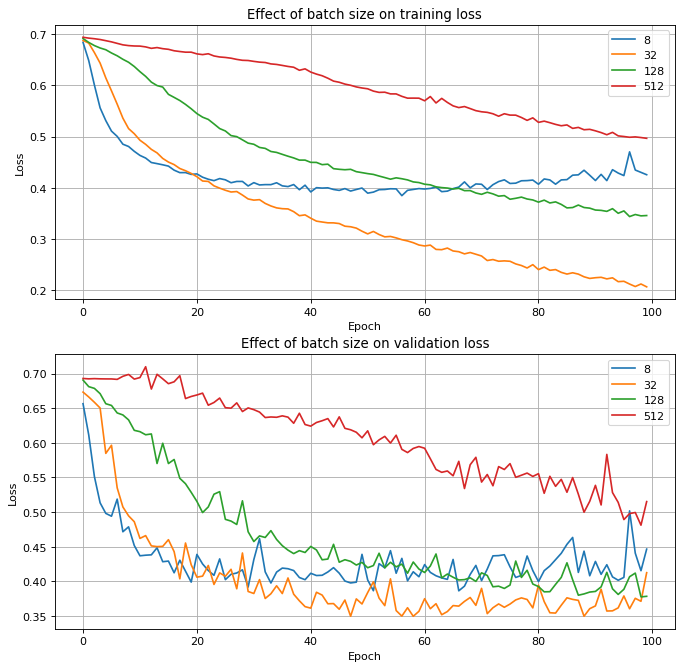

<Figure size 432x288 with 0 Axes>

In [11]:
ml_utils.plot_loss_by_param(model_state_by_type, 'batch size', 'batch_size_loss_2nd_try')

In [13]:
ml_utils.save_model_state(model_state_by_type, 'model_state_by_batch_size_2nd_try')

It looks like it may take many more iterations for larger batch sizes to converge. Let's try early stopping so we don't have to manually specify the number of iterations to run.

In [3]:
batch_sizes = [8, 32, 128, 512]
model_state_by_type_trial_3 = {}

for batch_size in batch_sizes:
    # Read training data
    train, validation = ml_utils.load_batched_and_resized_dataset(
        dataset_name='cats_and_dogs',   
        batch_size=batch_size,
        img_size=128
    )

    # Build and train model
    model = ml_utils.build_model(optimizer=keras.optimizers.SGD(learning_rate=0.01))
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
    model_state_by_type_trial_3[batch_size] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=20000,
        extra_callbacks=[es]
    )

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836
Epoch 1/20000
2327/2327 [==============================] - 57s 25ms/step - loss: 0.6873 - accuracy: 0.5503 - val_loss: 0.6778 - val_accuracy: 0.5929
Epoch 2/20000
2327/2327 [==============================] - 27s 12ms/step - loss: 0.6740 - accuracy: 0.5848 - val_loss: 0.6626 - val_accuracy: 0.6193
Epoch 3/20000
2327/2327 [==============================] - 27s 12ms/step - loss: 0.6580 - accuracy: 0.6114 - val_loss: 0.6377 - val_accuracy: 0.6599
Epoch 4/20000
2327/2327 [==============================] - 27s 12ms/step - loss: 0.6353 - accuracy: 0.6403 - val_loss: 0.6135 - val_accuracy: 0.6750
Epoch 5/20000
2327/2327 [==============================] - 27s 12m

2327/2327 [==============================] - 27s 11ms/step - loss: 0.4727 - accuracy: 0.7692


KeyboardInterrupt: 

In [45]:
for batch_size, model_state in model_state_by_type.items():
    print("Batch size {}".format(batch_size))
    for i in range(4):
        print("\tEpoch {}".format(i))
        flattened_weights = np.array([])
        curr_weights = model_state.weights_by_epoch[i]
        for j in range(len(curr_weights)):
            flattened_weights = np.concatenate((flattened_weights, curr_weights[j].flatten()))
        print("\tNorm: ", np.linalg.norm(flattened_weights))

Epoch 0
Norm:  27.4336502727029
Epoch 1
Norm:  27.449913808055737
Epoch 2
Norm:  27.466143766527928
Epoch 3
Norm:  27.4870729318222
